# Linear regressions

During preliminary design and, above all, when optimising solutions, it is useful to have simple equations for calculating the main characteristics of the component. We will now look at how to transform data, coming from catalogs, into algebraic equations using regression.
 
![Simulation Models](./assets/images/RegressionNeeds.png)

For interested readers, more information can be found in the following document (Chapter 4 – Metamodels for model-based-design of mechatronic systems):  
> Budinger, M. (2014). Preliminary design and sizing of actuation systems (HDR dissertation, UPS Toulouse). [Link](https://hal.science/tel-01112448v1/document)

### Statistical data analysis: main steps 

The main steps to follow in order to obtain an estimation model using data are:  
1– **Obtaining data**: components’ data can be provided by catalogues or design models on which we will have simulated a set of well chosen design parameters (using design of experiments for instance).  
2– **Choosing parameters** representating primary characteristics: the objective here is to reduce the number of inputs for the model. In order to do that, we can detect and choose the most important parameters using a correlation analysis. A dimensional analysis  can also help to reduce the number of coefficients to be considered.  
3– **Choosing the mathematical model type**: this means to choose the mathematical form of the equation on which the regression will be applied (polynoms, linear sum of functions, power products,…).  
4– **Apply the regression**: the objective is to minimize the disparity between data and the mathematical equation of the model.  


### Gearbox Data

Examples of this notebook will be given using gear reducers data coming from manufacturers.

![Simulation Models](./assets/images/GearBoxData.png)

These data are stored in excel files, which can be read here using the `pandas` package in `dataframe` format.  The database contains a wide range of information: mass, torsional stiffness, efficiency, dimensions, etc.


In [1]:
import pandas as pd

# Read the meaning of the different parameters
df_head = pd.read_excel("GearBoxHead.xlsx")
df_head

,Constructor,size,number stage,ratio,torque output,rate input,efficiency,torsional stiffness,backlash,inertia input,mass,Power,Diameter,Length
0,(-),(-),(-),(-),(Nm),(tr/min),(%),(Nm/arcmin),(arcmin),(kg cm2),(kg),(W),(mm),(mm)
1,Constructor,size,Ns,N,Tout,Win,Eta,K,Dteta,J,M,P,D,L


In [2]:
# Read the data
df = pd.read_excel("GearBoxData.xlsx")

# Print the 5 first lines of the database
df.head()


,Constructor,size,Ns,N,Tout,Win,Eta,K,Dteta,J,M,P,D,L
0,NEUGART,PLS 70 HP-4,1,4,110.0,1700,98,7.0,3.0,0.42,2.6,4895.648552,75,122.0
1,NEUGART,PLS 70 HP-5,1,5,110.0,2000,98,7.0,3.0,0.37,2.6,4607.669225,75,122.0
2,NEUGART,PLS 90 HP-4,1,4,220.0,1350,98,10.0,3.0,1.05,4.0,7775.441818,100,138.5
3,NEUGART,PLS 90 HP-5,1,5,220.0,1600,98,10.0,3.0,0.85,4.0,7372.270760,100,138.5
4,NEUGART,PLS 115 HP-4,1,4,520.0,800,98,22.0,3.0,2.30,7.5,10890.854532,130,189.0


### Choosing parameters

We will assume that we want to construct a gearbox mass estimation model. We therefore first need to determine which parameters are most important in estimating this. Using the catalogue data, we can apply a correlation analysis and display it in the form of a table showing the correlation between each parameter. This table is symmetrical.

> **Statistics Basic:**
Classical statistic tools can be used to characterize a data serie and the links that exist between two data series:  
-The **mean** of each data series.  
$\bar{x}=\frac{1}{n}\sum_{i=1}^{n} x_i$  
-The **standard deviation** which gives the dispersion of a series of values, around their mean value.  
$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\bar{x})^2}$  
-The **covariance** which is a number that gives the possibility to evaluate the variation way of two variables and , that way, define if these variables are independant or not. That way, if 2 quantities vary the same way, or in opposite ways, the covariance value will be higher.  
$cov(x,y)=\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})$    
-The **correlation**, also related to the link between two variables. It’s actually the Covariance, normalized on a scale from -1 to 1.   
$cor(x,y)=\frac{1}{n-1}\frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{s_xs_y}$    


Dataframes can be used to calculate the correlation matrix directly and simply. 


In [3]:
df.corr()

/var/folders/8f/0st0j4vx0k5fzpjhfpf2fn3n1r3782/T/ipykernel_34040/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ns,N,Tout,Win,Eta,K,Dteta,J,M,P,D,L
Ns,1.000000,0.354501,-0.204966,0.530513,-0.734179,-0.236948,0.680305,-0.238785,-0.103814,-0.203182,-0.263935,0.293952
N,0.354501,1.000000,0.063755,0.040779,-0.608730,0.079991,0.182424,0.057529,-0.000207,-0.244010,0.043081,-0.098758
Tout,-0.204966,0.063755,1.000000,-0.436716,0.088456,0.916671,-0.320480,0.885686,0.800741,0.290815,0.798191,0.350260
Win,0.530513,0.040779,-0.436716,1.000000,-0.272927,-0.437381,0.639898,-0.301804,-0.442977,-0.127484,-0.652336,-0.139995
Eta,-0.734179,-0.608730,0.088456,-0.272927,1.000000,0.063514,-0.505211,0.082149,0.073080,0.357831,0.156639,0.000155
K,-0.236948,0.079991,0.916671,-0.437381,0.063514,1.000000,-0.332987,0.775942,0.853291,0.219011,0.820234,0.280267
Dteta,0.680305,0.182424,-0.320480,0.639898,-0.505211,-0.332987,1.000000,-0.256920,-0.288968,-0.167897,-0.465782,-0.023637
J,-0.238785,0.057529,0.885686,-0.301804,0.082149,0.775942,-0.256920,1.000000,0.587566,0.347930,0.640275,0.176444
M,-0.103814,-0.000207,0.800741,-0.442977,0.073080,0.853291,-0.288968,0.587566,1.000000,0.295261,0.791580,0.592270
P,-0.203182,-0.244010,0.290815,-0.127484,0.357831,0.219011,-0.167897,0.347930,0.295261,1.000000,0.245700,0.355627


This matrix can then be [graphically formatted](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e) for easier analysis. 

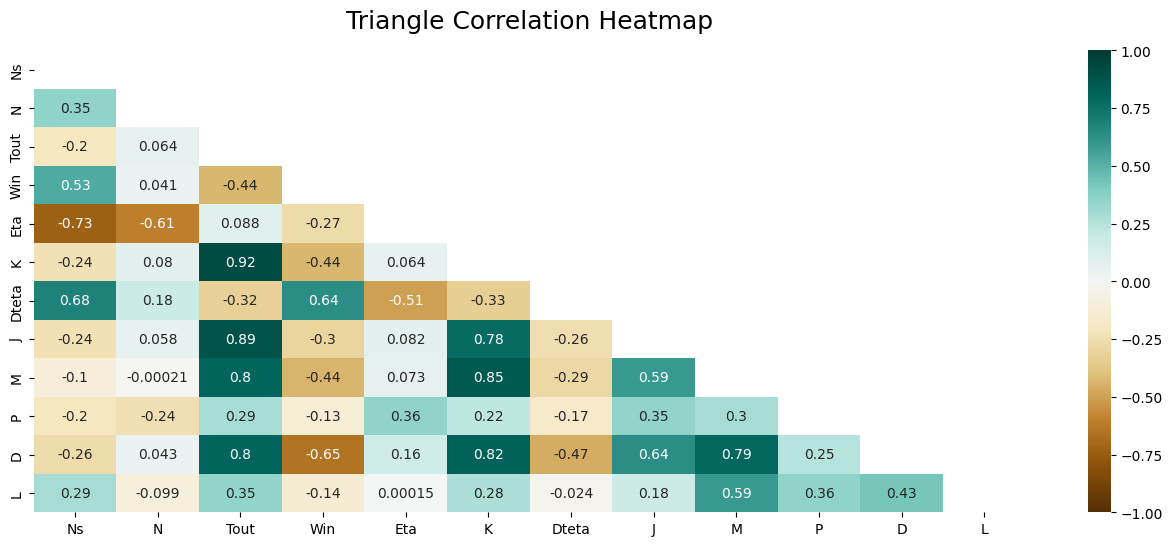

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 6)) 

# define the mask to set the values in the upper triangle to Truemask 
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool)) # one_like = 1 matrix with df.corr size + triu = Upper triangle of an array.

heatmap = sns.heatmap(df.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

We can see that :
- the reduction ratio and the number of stages have little influence on the mass
- the most important and primary parameter is the output torque.

**Note:** the [correlation matrix](https://www.ablebits.com/office-addins-blog/correlation-excel-coefficient-matrix-graph/) can also be produced in Excel using the [analysis toolpack](https://support.microsoft.com/fr-fr/office/charger-l-analysis-toolpak-dans-excel-6a63e598-cd6d-42e3-9317-6b40ba1a66b4).

### Linear regression 
Parametric regressions are based on models requiring the estimation of a finite number of parameters $\theta$ that express the effects of basis functions on the response surface. With polynomial interpolation or regression, the basis functions are ${1, x, x^2, …, x^p}$. The idea is to obtain a surface that is differentiable and continuous. For a polynomial development of order 2 (p = 2), the expression is:

$y=f(\underline{x}, \underline{\theta})=\theta_0 + \sum_{i=1}^{k} \theta_0 x_i + \sum_{i=1, j=1}^{k} \theta_{ij} x_i x_j $  

with $\underline{x}=\begin{pmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{k}
         \end{pmatrix}$

which, for the $n$ experiments, can be written with a matrix representation:
$\underline{Y}=\underline{X}.\underline{\theta}+\underline{\varepsilon}$ 

with $\underline{Y}=\begin{pmatrix}
           y^{(1)} \\
           \vdots \\
           y^{(n)}
         \end{pmatrix}$ ,
         $\underline{x}=\begin{pmatrix}
           1, x_{1}^{(1)}, ..., x_{k}^{2(1)}   \\
           \vdots \\
           1, x_{1}^{(n)}, ..., x_{k}^{2(n)}   
         \end{pmatrix}$,
         $\underline{x}=\begin{pmatrix}
           \theta_0 \\
           \vdots \\
           \theta_{k_{theta}}
         \end{pmatrix}$,
         $\underline{x}=\begin{pmatrix}
           \varepsilon^{(1)} \\
           \vdots \\
           y^{(n)}
         \end{pmatrix}$

where :
- $k_x$ is the number of design parameters;
- $n$ is the number of experiments of the DoE;
- $p$ is the order of the polynomial function;
- $k_\theta$ is the size of vector θ.

If $n=k_\theta$, the matrix $X$ is square and the interpolation is possible. In the most common case, where $k_\theta$ is lower than $n$, interpolation is impossible. The objective of regression is to find an approximation showing an error of zero mean and a minimum standard deviation. The errors are expressed by:  
$\underline{\varepsilon}=\underline{Y}-\underline{X}.\underline{\theta}$   

The standard deviation is a function of the sum of the quadratic error $\underline{\varepsilon}^t\underline{\varepsilon}$ and is minimum for:  

 $\underline{\theta}=(\underline{X}^t\underline{X})^{-1} \underline{X}^t\underline{Y}$  




### Mass and inertia regression 

The aim is to perform regression on part of the data: the [Sumitomo cyclo-reducers](https://us.sumitomodrive.com/sites/default/files/2023-07/precision-gearbox-catalog-07-2021.pdf). First, only the Sumitomo are selected:

In [5]:
# Data Filtering
# Keeping only SUMITOMO type
df_S = df[df["Constructor"] == "SUMITOMO"]
df_S.head()

,Constructor,size,Ns,N,Tout,Win,Eta,K,Dteta,J,M,P,D,L
613,SUMITOMO,106,1,11,25.0,500,95,1.5,3.0,0.15,1.2,118.999722,85,130.0
614,SUMITOMO,106,1,17,25.0,500,95,1.6,3.0,0.14,1.2,76.999820,85,130.0
615,SUMITOMO,106,1,29,25.0,500,95,2.6,3.0,0.14,1.2,45.137825,85,130.0
616,SUMITOMO,106,1,43,25.0,500,95,2.8,3.0,0.14,1.2,30.441789,85,130.0
617,SUMITOMO,108,1,11,75.0,500,95,5.0,3.0,1.30,4.3,356.999165,118,180.0


The data shows a dispersion due to several types of reducers. They differ in the type of output shaft. We will now only included the lightest ones here, i.e. the FC range.

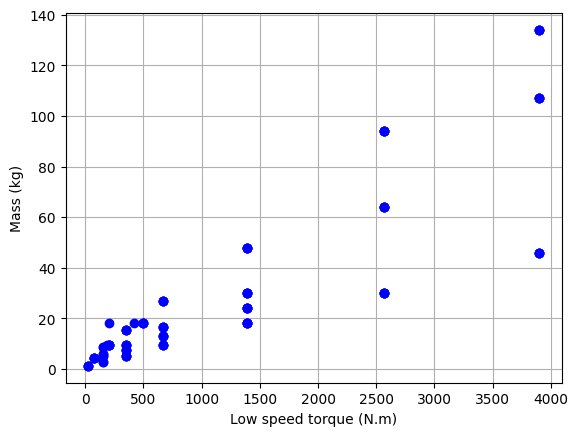

In [6]:
# Plot the data
plt.plot(df_S["Tout"], df_S["M"], "bo")
plt.xlabel("Low speed torque (N.m)")
plt.ylabel("Mass (kg)")
plt.grid()
plt.show()

In [7]:
# Data Filtering
# Keeping only FC range type
df_S = df_S[df_S["size"].astype(str).str[0:2] == "FC"]
df_S.head()

,Constructor,size,Ns,N,Tout,Win,Eta,K,Dteta,J,M,P,D,L
634,SUMITOMO,FC-A15(G),1,59,149.0,1500,95,20.0,2.0,0.313,2.7,396.692632,120,60.0
635,SUMITOMO,FC-A15(G),1,89,149.0,1500,95,20.0,2.0,0.310,2.7,262.976014,120,60.0
636,SUMITOMO,FC-A25(G),1,29,349.0,1500,95,53.0,2.0,1.380,5.2,1890.372131,150,75.0
637,SUMITOMO,FC-A25(G),1,59,349.0,1500,95,70.0,2.0,1.340,5.2,929.165963,150,75.0
638,SUMITOMO,FC-A25(G),1,89,349.0,1500,95,70.0,2.0,1.330,5.2,615.963953,150,75.0


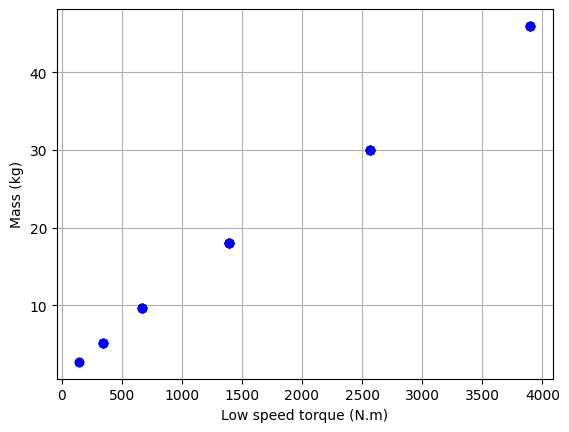

In [8]:
# Plot the data
plt.plot(df_S["Tout"], df_S["M"], "bo")
plt.xlabel("Low speed torque (N.m)")
plt.ylabel("Mass (kg)")
plt.grid()
plt.show()

[Scikit-learn](https://scikit-learn.org)  is a free machine learning package and can be used for linear regression.  It features also various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means, ... Below an example of use of this package for [linear regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) of the gear reducers data.

/var/folders/8f/0st0j4vx0k5fzpjhfpf2fn3n1r3782/T/ipykernel_34040/1877653624.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(reg_M.intercept_)


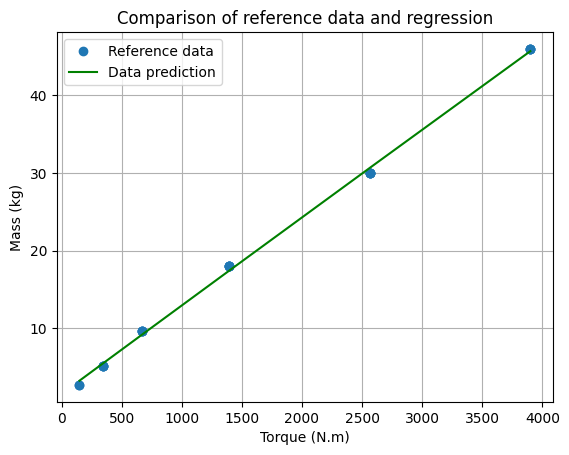

Mass estimation model : M = 1.54 + 0.01 * Tout with R2=0.999


In [9]:
# Import packages
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data
x = df_S["Tout"].values # Torque input
y = df_S["M"].values # Mass output

# Matrix X and Y
n=1 # order of polynomial regression

poly = PolynomialFeatures(degree=2, include_bias=False) # 1 vector is nt necessary with sklearn
X =poly.fit_transform(x.reshape(-1, 1)) #  reshape(-1,1) transforms our numpy array x from a 1D array to a 2D array

Y = y.reshape(-1, 1) 
      
# Create a new object for the linear regression
reg_M = linear_model.LinearRegression()

reg_M.fit(X, Y)

# Y vector prediction
M_est = reg_M.predict(X)

# M regression Parameters
# ----
coef = reg_M.coef_
intercept = float(reg_M.intercept_)
r2 = r2_score(Y, M_est)


# Plot the data
plt.plot(x, Y, "o", label="Reference data")
plt.plot(x, M_est, "-g", label="Data prediction")
plt.xlabel("Torque (N.m)")
plt.ylabel("Mass (kg)")
plt.title("Comparison of reference data and regression")
plt.legend()
plt.grid()
plt.show()

print(f"Mass estimation model : M = {intercept:.2f} + {coef[0,0]:.2f} * Tout with R2={r2:.3f}")

**Note:** the [linear regression](https://www.ablebits.com/office-addins-blog/linear-regression-analysis-excel/) can also be produced in Excel using the [analysis toolpack](https://support.microsoft.com/fr-fr/office/charger-l-analysis-toolpak-dans-excel-6a63e598-cd6d-42e3-9317-6b40ba1a66b4) or with trendline option on excel graphs.

> **Homework**: Adapt previous code to set up an inertia estimation model. Two types of models can be used and compared: an order 2 polynom and a power law. 

**Note:** A product of power laws, can be linearized by a logarithmic transformation.  
$y=a_0 \prod_i x_i^{a_i} \longrightarrow log(y)=log(a_0) + \sum_i a_i log(x_i) $ 

